In [2]:
# import modules
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import numpy as np
import random

C:\Users\facul\Anaconda3\envs\openCV\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

print(type(x_test))
print(type(y_test[0]))

4423680/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


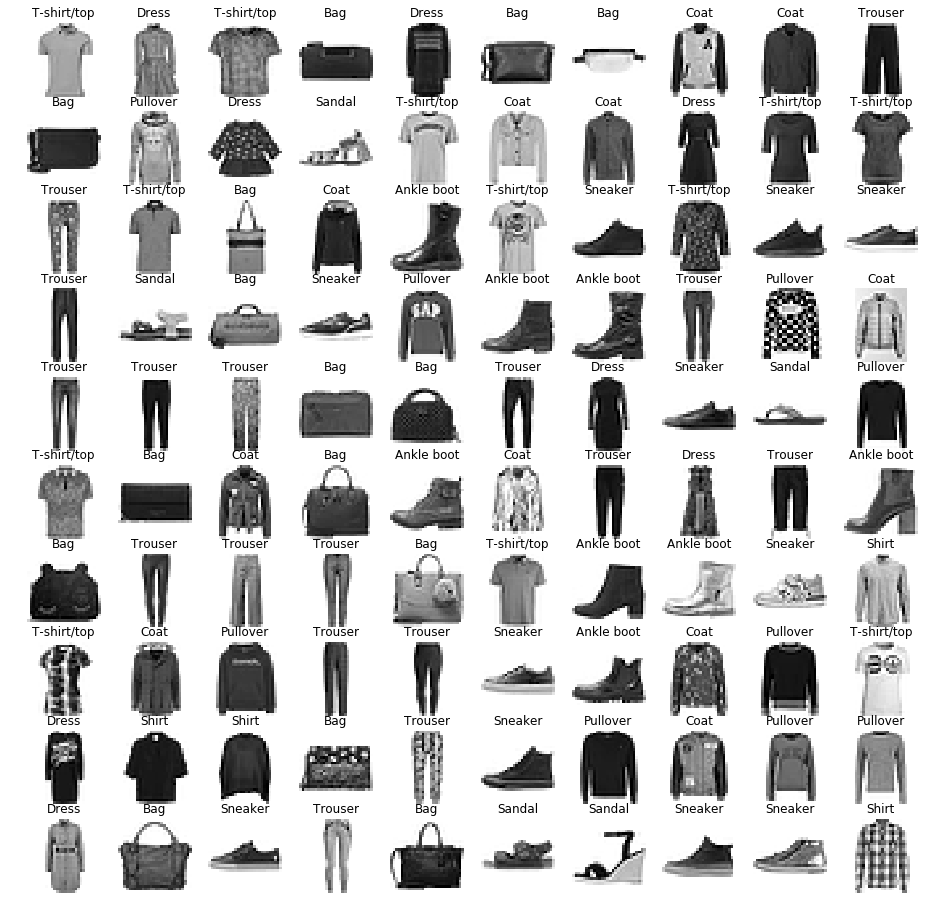

In [4]:
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])

#index = 0
index = random.randint(0, x_test.shape[0]/2)
i = index

# plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
plt.figure(figsize=(16,16))

# draw fashion-mnist images and label names
pos = 1
for img in x_test[index:index+100]:
    plt.subplot(10, 10, pos)
    plt.axis('off')
    plt.imshow(img.reshape(28, 28), cmap=cm.gray_r)
    plt.title( fashion_mnist_labels[y_test[i]] )
    pos += 1
    i += 1

plt.show()

## Fashion-MNISTを判別してみる

In [9]:
'ライブラリをインポートする'
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
#matplotlibのグラフをJupyter Notebookのインラインで表示 
%matplotlib inline

#Kerasが提供するSequentialモデルをインポート
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

In [7]:
'データセットのインポート'
from keras.datasets import fashion_mnist

In [12]:
'データをロードする'
#学習データとテストデータをKerasが用意しているFashion-MNISTデータ・セットから読み込む
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

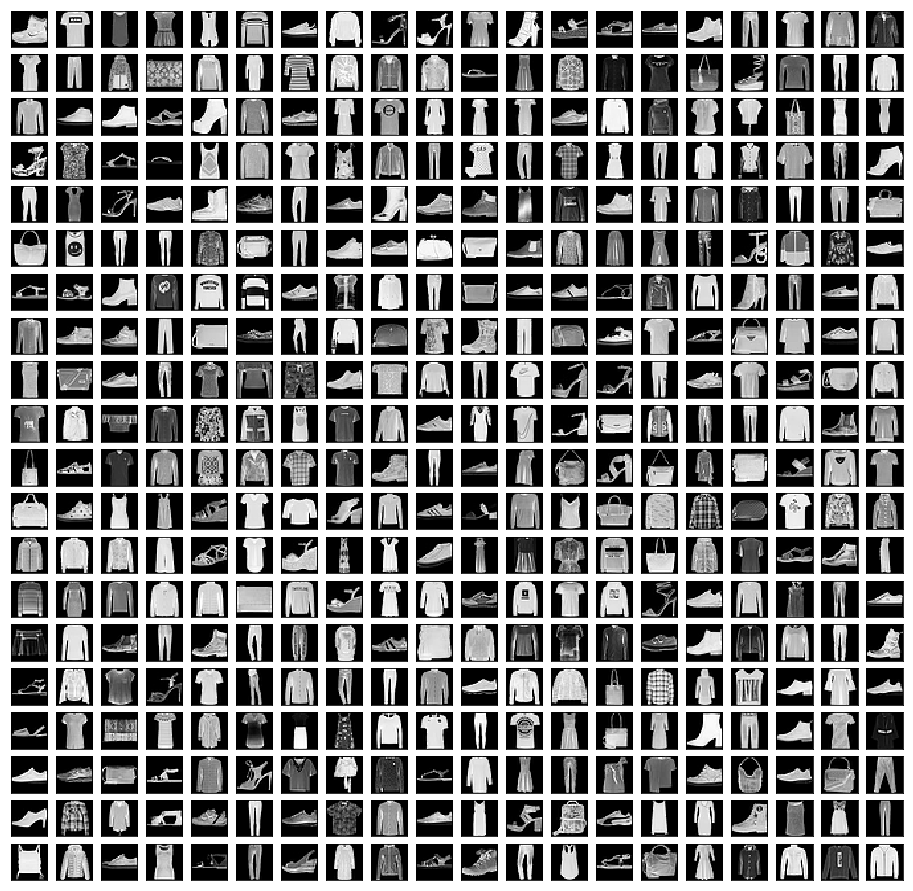

In [13]:
'一部を確認してみる'
%matplotlib inline


# 400枚の画像を20×20の行列としてプロットする
n_cols = 20
n_rows = 20

#サブプロットで複数の画像を16ピクセル×16ピクセルとして表示させる。
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16,16))

for ax, pixels in zip(axs.flat, X_train):
    ax.imshow(pixels, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [14]:
'データをリシェープする.このままだと使いづらいので, 学習用なら60000×10の行列にする'
#学習データを784列の2次元配列としてリシェープする
X_train = X_train.reshape(60000, 784)  # 学習用データ
X_test = X_test.reshape(10000, 784)    # テスト用データ

In [16]:
'データの正規化'
#各画像は、グレースケールとしてエンコーディング（255: 白、0: 黒）に対応する
#8ビットの符号なし整数を使って符号化されているため、データを正規化し、値を[0,1]間隔にリスケールし、浮動小数点数に変換する。
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [17]:
'ラベルをOne-Hotエンコードにする'
#One-Hotエンコーディングを適用する
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [18]:
'ニューラルネットの学習'
# np.random.seedの引数を指定して毎回同じ乱数を生成させる（再現性のため）
np.random.seed(1234)

#batch_size - ANNトレーニングで使用されたミニバッチのサイズ
batch_size = 128

#nr_classes - ターゲットクラスの数。可能な10桁の数字（0〜9）
nr_classes = 101

#nr_iterations - ANNトレーニングの期間（エポック）
nr_iterations = 1000

#Kerasが用意するSequentialモデルを使用する
model = Sequential()

#入力層に784個のニューロン（28×28ピクセル）を追加する
model.add(Dense(200, input_shape=(784,)))

#入力層の活性化関数を設定し、そのニューロンを整流された線形単位に変換する
model.add(Activation('relu'))

#過学習を防ぐため学習時間中に各更新時にランダムに入力単位の割合を0に設定するドロップアウトレイヤーを追加する
model.add(Dropout(0.5))

#10個のニューロン（10個の可能なクラス）で構成される出力層を追加し、値はsoftmax関数に渡す。
model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
# モデルの概要を表示させる
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
#コンパイルしてニューラルネットワークを学習する
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [21]:
#経過を表示させながら学習を実行させる
history = model.fit(X_train, Y_train,
                    batch_size = batch_size, epochs = nr_iterations,
                    verbose = 1, validation_data = (X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose = 0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 4s 71us/step - loss: 1.5658 - acc: 0.5265 - val_loss: 1.0499 - val_acc: 0.6737
Epoch 2/1000
60000/60000 [==============================] - 4s 73us/step - loss: 0.9361 - acc: 0.6758 - val_loss: 0.7849 - val_acc: 0.7348
Epoch 3/1000
60000/60000 [==============================] - 4s 70us/step - loss: 0.7709 - acc: 0.7245 - val_loss: 0.6894 - val_acc: 0.7540
Epoch 4/1000
60000/60000 [==============================] - 4s 70us/step - loss: 0.7022 - acc: 0.7462 - val_loss: 0.6410 - val_acc: 0.7651
Epoch 5/1000
60000/60000 [==============================] - 4s 63us/step - loss: 0.6550 - acc: 0.7651 - val_loss: 0.6071 - val_acc: 0.7773
Epoch 6/1000
60000/60000 [==============================] - 5s 76us/step - loss: 0.6236 - acc: 0.7757 - val_loss: 0.5807 - val_acc: 0.7890
Epoch 7/1000
60000/60000 [==============================] - 4s 68us/step - loss: 0.5980 - acc: 0.7857 - val_loss: 0.

60000/60000 [==============================] - 4s 58us/step - loss: 0.3661 - acc: 0.8714 - val_loss: 0.3741 - val_acc: 0.8658
Epoch 60/1000
60000/60000 [==============================] - 3s 57us/step - loss: 0.3633 - acc: 0.8709 - val_loss: 0.3743 - val_acc: 0.8655
Epoch 61/1000
60000/60000 [==============================] - 4s 69us/step - loss: 0.3637 - acc: 0.8718 - val_loss: 0.3739 - val_acc: 0.8651
Epoch 62/1000
60000/60000 [==============================] - 4s 63us/step - loss: 0.3624 - acc: 0.8726 - val_loss: 0.3726 - val_acc: 0.8637
Epoch 63/1000
60000/60000 [==============================] - 4s 59us/step - loss: 0.3583 - acc: 0.8721 - val_loss: 0.3726 - val_acc: 0.8645
Epoch 64/1000
60000/60000 [==============================] - 3s 58us/step - loss: 0.3586 - acc: 0.8724 - val_loss: 0.3706 - val_acc: 0.8667
Epoch 65/1000
60000/60000 [==============================] - 4s 68us/step - loss: 0.3581 - acc: 0.8737 - val_loss: 0.3691 - val_acc: 0.8660
Epoch 66/1000
60000/60000 [=======

60000/60000 [==============================] - 3s 57us/step - loss: 0.3152 - acc: 0.8879 - val_loss: 0.3407 - val_acc: 0.8802
Epoch 118/1000
60000/60000 [==============================] - 4s 60us/step - loss: 0.3147 - acc: 0.8885 - val_loss: 0.3420 - val_acc: 0.8777
Epoch 119/1000
60000/60000 [==============================] - 4s 65us/step - loss: 0.3145 - acc: 0.8885 - val_loss: 0.3401 - val_acc: 0.8789
Epoch 120/1000
60000/60000 [==============================] - 4s 64us/step - loss: 0.3142 - acc: 0.8883 - val_loss: 0.3405 - val_acc: 0.8792
Epoch 121/1000
60000/60000 [==============================] - 4s 61us/step - loss: 0.3130 - acc: 0.8886 - val_loss: 0.3385 - val_acc: 0.8790
Epoch 122/1000
60000/60000 [==============================] - 3s 56us/step - loss: 0.3114 - acc: 0.8894 - val_loss: 0.3395 - val_acc: 0.8801
Epoch 123/1000
60000/60000 [==============================] - 4s 74us/step - loss: 0.3109 - acc: 0.8891 - val_loss: 0.3395 - val_acc: 0.8802
Epoch 124/1000
60000/60000 [

60000/60000 [==============================] - 4s 66us/step - loss: 0.2854 - acc: 0.8990 - val_loss: 0.3280 - val_acc: 0.8854
Epoch 176/1000
60000/60000 [==============================] - 4s 71us/step - loss: 0.2843 - acc: 0.8989 - val_loss: 0.3289 - val_acc: 0.8863
Epoch 177/1000
60000/60000 [==============================] - 5s 75us/step - loss: 0.2838 - acc: 0.8988 - val_loss: 0.3291 - val_acc: 0.8849
Epoch 178/1000
60000/60000 [==============================] - 4s 74us/step - loss: 0.2834 - acc: 0.8992 - val_loss: 0.3278 - val_acc: 0.8878
Epoch 179/1000
60000/60000 [==============================] - 5s 85us/step - loss: 0.2816 - acc: 0.8979 - val_loss: 0.3296 - val_acc: 0.8865
Epoch 180/1000
60000/60000 [==============================] - 4s 61us/step - loss: 0.2837 - acc: 0.8994 - val_loss: 0.3270 - val_acc: 0.8854
Epoch 181/1000
60000/60000 [==============================] - 4s 68us/step - loss: 0.2814 - acc: 0.8992 - val_loss: 0.3271 - val_acc: 0.8866
Epoch 182/1000
60000/60000 [

60000/60000 [==============================] - 4s 59us/step - loss: 0.2627 - acc: 0.9062 - val_loss: 0.3223 - val_acc: 0.8896
Epoch 234/1000
60000/60000 [==============================] - 3s 54us/step - loss: 0.2636 - acc: 0.9053 - val_loss: 0.3226 - val_acc: 0.8890
Epoch 235/1000
60000/60000 [==============================] - 4s 64us/step - loss: 0.2625 - acc: 0.9060 - val_loss: 0.3211 - val_acc: 0.8898
Epoch 236/1000
60000/60000 [==============================] - 4s 61us/step - loss: 0.2621 - acc: 0.9052 - val_loss: 0.3240 - val_acc: 0.8887
Epoch 237/1000
60000/60000 [==============================] - 4s 61us/step - loss: 0.2641 - acc: 0.9052 - val_loss: 0.3205 - val_acc: 0.8908
Epoch 238/1000
60000/60000 [==============================] - 3s 56us/step - loss: 0.2613 - acc: 0.9059 - val_loss: 0.3212 - val_acc: 0.8905
Epoch 239/1000
60000/60000 [==============================] - 3s 58us/step - loss: 0.2599 - acc: 0.9057 - val_loss: 0.3213 - val_acc: 0.8897
Epoch 240/1000
60000/60000 [

KeyboardInterrupt: 

In [ ]:
#結果を表示させる
print('Test loss:', score[0])
print('Test accuracy:', score[1])